In [3]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

<b>Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</b>

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

The main aim is to determine whether a patient is at risk of diabetes based on various characteristics and features.

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values in our data"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


"Let's have more information about the dateset and check the statiscal analysis of the data"

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

"Interpretation: \n",
    "* The Outcome shows a minimum values equal to 0 and max=1, this will a binary classification problem\n",
    "* The minimum of features like Pregnancies\tGlucose\tBloodPressure\tSkinThickness\tInsulin\tBMI are 0 and the maximum values are continous values\n",
    "* The age of persons varies from 21 to 81, it means diabetes are more detected in adults people"

### Exploratory Data Analysis (EDA)

<AxesSubplot:>

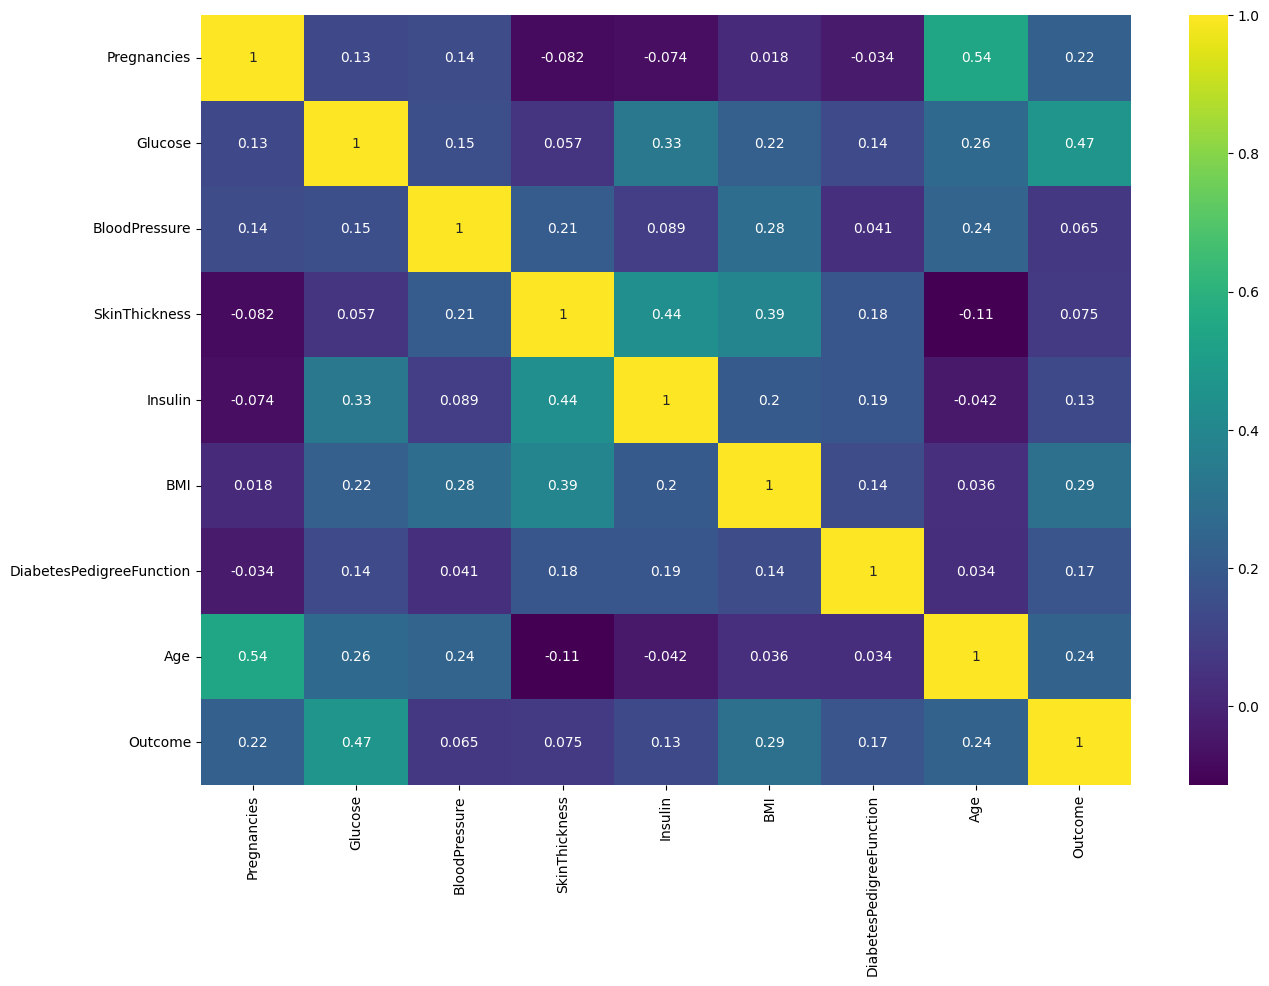

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

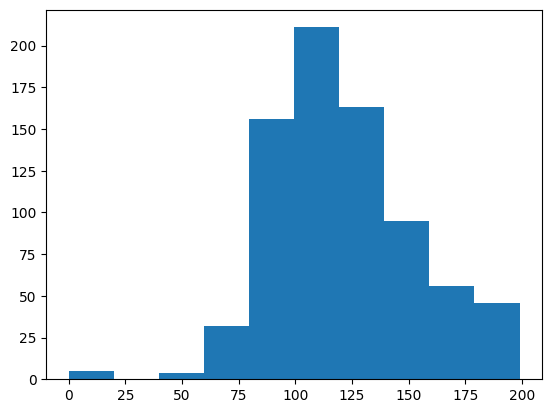

In [11]:
#plt.figure(figsize=(15, 8))
#sns.countplot(df, x='Glucose')
plt.hist(df['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

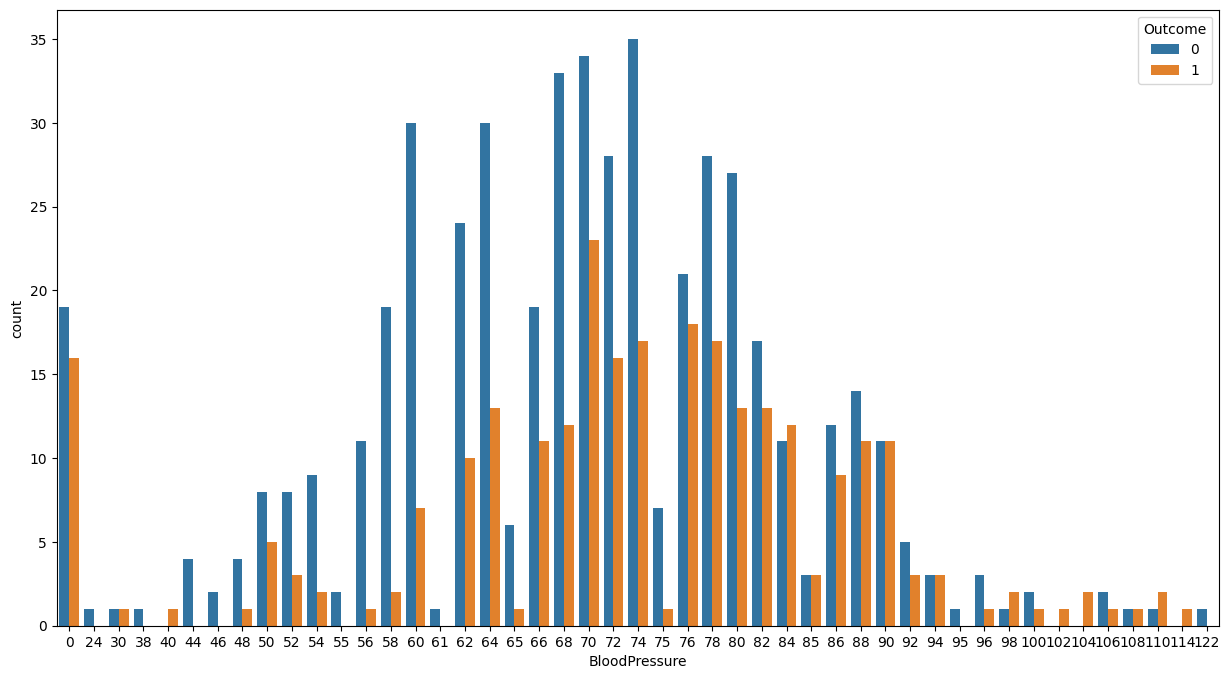

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x='BloodPressure', hue='Outcome')

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

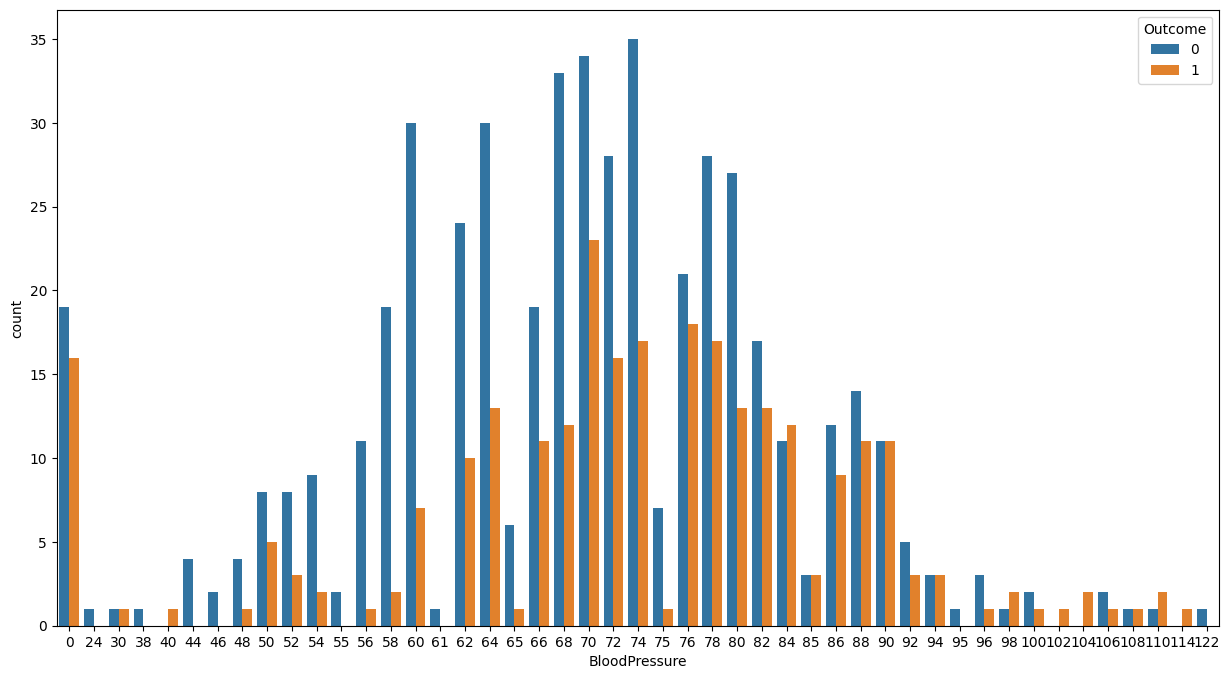

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x='BloodPressure', hue='Outcome')

In [14]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The report genetareted by pandas profiling contains all the necessary visualizations about our dataset

In [15]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [16]:
# y= df.Outcome
# X=df.drop('Outcome', axis=1)

<AxesSubplot:>

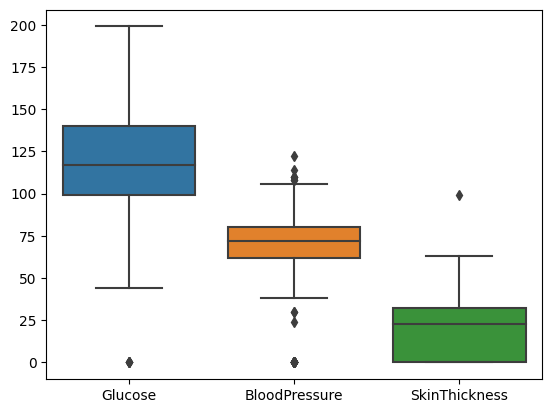

In [17]:
sns.boxplot(df[['Glucose','BloodPressure', 'SkinThickness']])

<AxesSubplot:>

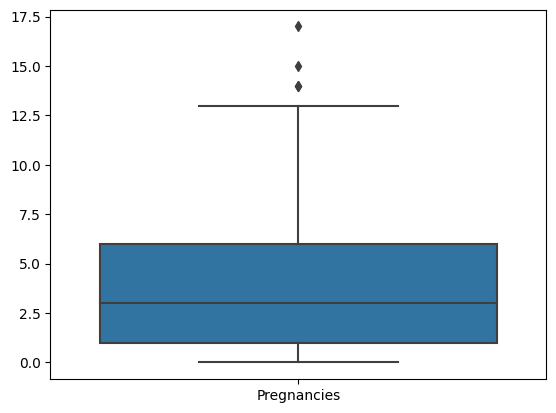

In [18]:
sns.boxplot(df[['Pregnancies']])


<AxesSubplot:>

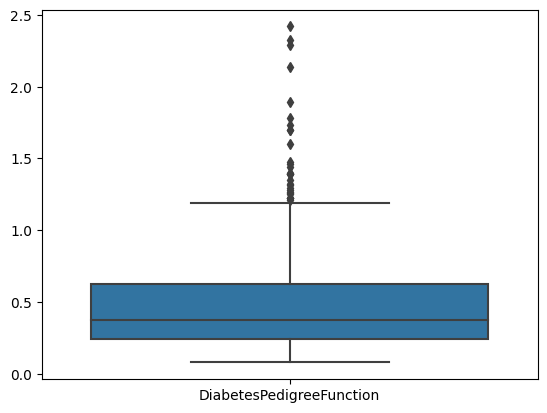

In [19]:
 sns.boxplot(df[['DiabetesPedigreeFunction']])

<AxesSubplot:>

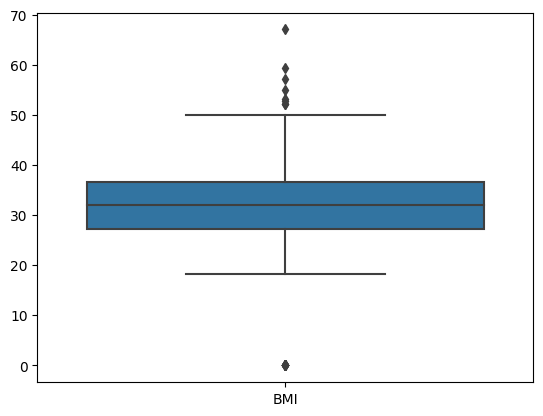

In [20]:
sns.boxplot(df[['BMI']])

In [21]:
#''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['BMI'] >= upper)[0]
lower_array = np.where(df['BMI'] <= lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (749, 9)


In [22]:
# IQR
# Calculate the upper and lower limits
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Create a boolean mask indicating the outlier rows
outliers_mask = (df['DiabetesPedigreeFunction'] < lower) | (df['DiabetesPedigreeFunction'] > upper)

# Remove the outliers
df = df[~outliers_mask]

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)


New Shape:  (722, 9)


In [23]:
# #''' Detection '''
# # IQR
# # Calculate the upper and lower limits
# Q1 = df['BMI'].quantile(0.25)
# Q3 = df['BMI'].quantile(0.75)
# IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
# upper = Q3 + 1.5*IQR
 
# # Create arrays of Boolean values indicating the outlier rows
# upper_array = np.where(df['BMI'] >= upper)[0]
# lower_array = np.where(df['BMI'] <= lower)[0]
 
# # Removing the outliers
# df.drop(index=upper_array, inplace=True)
# df.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
# print("New Shape: ", df.shape)

In [24]:
y= df.Outcome
X=df.drop('Outcome', axis=1)

In [25]:
y.value_counts()

0    478
1    244
Name: Outcome, dtype: int64

"* 0 represent Non diabetic persons\n",
"* 1 represent diabetic persons"

Text(0.5, 1.0, "Diabetes's target countplot")

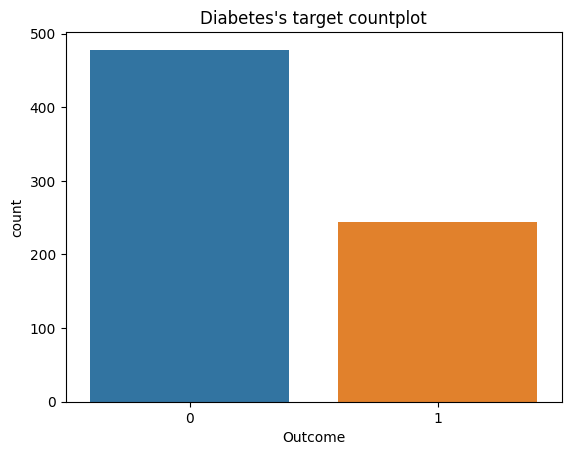

In [26]:
sns.countplot(df, x=y)
plt.title("Diabetes's target countplot")

In [27]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.311715  109.702929      68.859833       19.89749   66.985356   
1           4.971311  141.577869      70.959016       21.47541  100.811475   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.763598                  0.401429  31.202929  
1        34.869672                  0.487951  37.430328

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
X_train.shape, X_test.shape

((577, 8), (145, 8))

In [30]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# Create MinMaxScaler\n",
scaler = MinMaxScaler()

# Fit and transform on training data\n",
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler\n",
X_test = scaler.transform(X_test)


In [31]:
X_train[:5]

array([[0.17647059, 0.39593909, 0.40983607, 0.32323232, 0.10401891,
        0.40251572, 0.15274034, 0.09803922],
       [0.41176471, 0.76142132, 0.54098361, 0.42424242, 0.40425532,
        0.51886792, 0.57502246, 0.41176471],
       [0.        , 0.4822335 , 0.6557377 , 0.45454545, 0.10874704,
        0.5754717 , 0.22641509, 0.09803922],
       [0.41176471, 0.7715736 , 0.72131148, 0.44444444, 0.        ,
        1.        , 0.2327044 , 0.29411765],
       [0.76470588, 0.7715736 , 0.73770492, 0.33333333, 0.03427896,
        0.27044025, 0.58670261, 0.43137255]])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### Model definition

In [33]:
lr_clf= LogisticRegression()
svm_clf= SVC(kernel='linear')
nb_clf= BernoulliNB()
knn_clf= KNeighborsClassifier()
rf_clf= RandomForestClassifier(random_state=1000)
xgb_clf= XGBClassifier() 

### Training

In [34]:
lr_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Model evaluation

In [35]:
y_pred1= lr_clf.predict(X_test)
print("The training score LR is:", lr_clf.score(X_train, y_train))
print("The test score with LR is:", lr_clf.score(X_test, y_test))

The training score LR is: 0.8024263431542461
The test score with LR is: 0.6896551724137931


In [36]:
accuracy_score(y_test, y_pred1)

0.6896551724137931

In [37]:
y_pred2= svm_clf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.696551724137931

In [38]:
print("The training score SVM is:", svm_clf.score(X_train, y_train))
print("The test score with SVM is:", svm_clf.score(X_test, y_test))

The training score SVM is: 0.804159445407279
The test score with SVM is: 0.696551724137931


In [39]:
y_pred3= nb_clf.predict(X_test)
accuracy_score(y_test, y_pred3)

0.6620689655172414

In [40]:
y_pred4= knn_clf.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7379310344827587

In [41]:
print("The training score KNN is:", knn_clf.score(X_train, y_train))
print("The test score with KNN is:", knn_clf.score(X_test, y_test))

The training score KNN is: 0.8232235701906413
The test score with KNN is: 0.7379310344827587


In [42]:
y_pred5= rf_clf.predict(X_test)
accuracy_score(y_test, y_pred5)

0.7241379310344828

In [43]:
print("The training score Rf is:", rf_clf.score(X_train, y_train))
print("The test score with rf is:", rf_clf.score(X_test, y_test))

The training score Rf is: 1.0
The test score with rf is: 0.7241379310344828


In [44]:
y_pred6= xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred6)

0.6689655172413793

In [45]:
print("The training score XGBoost is:", xgb_clf.score(X_train, y_train))
print("The test score with XGboost is:", xgb_clf.score(X_test, y_test))

The training score XGBoost is: 1.0
The test score with XGboost is: 0.6689655172413793


confusion matrix xith Random Forest


<AxesSubplot:>

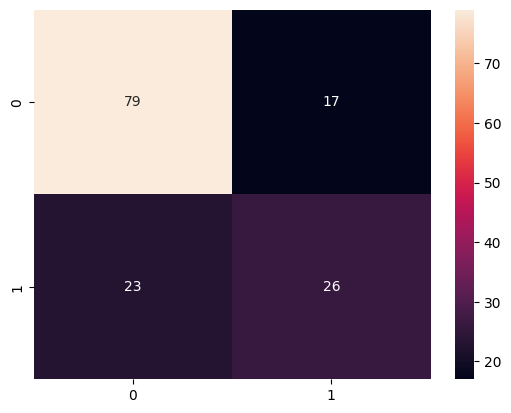

In [46]:
from sklearn.metrics import confusion_matrix
print("confusion matrix xith Random Forest")
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the false positive rate (FPR)  \n",
# and true positive rate (TPR) for different classification thresholds \n",
fpr, tpr, thresholds = roc_curve(y_test, y_pred5, pos_label=1)
# Compute the ROC AUC score \n",
roc_auc = roc_auc_score(y_test, y_pred1)

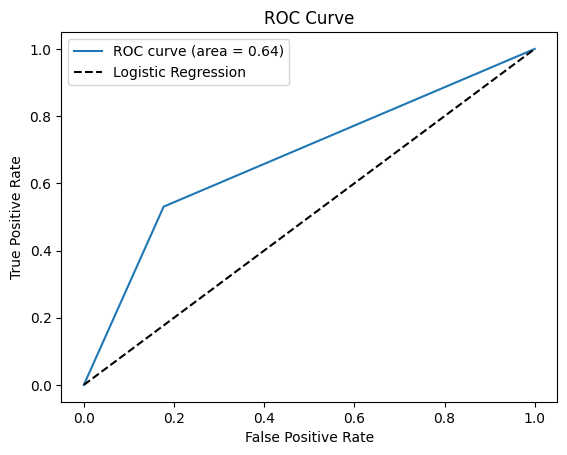

In [48]:
# Plot the ROC curve \n",
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr \n",
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend()
plt.show()

### HyperParmterTuning

In [49]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth':[3,10,2],
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            #'C': [1,5,10,15],
            'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100,200, 300,500]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

In [ ]:
model1= LogisticRegression(C= 0.001, max_iter=100, penalty='none')
model1.fit(X_train, y_train)
y_pred_lr= model1.predict(X_test)

In [ ]:
print("The training score with LogisticRegression is:", model1.score(X_train, y_train))
print("The test score with LogisticRegression is:", model1.score(X_test, y_test))

In [ ]:

#model2= RandomForestClassifier(max_depth=10, n_estimators=15)
model2= RandomForestClassifier(max_depth=10, max_leaf_nodes=9, n_estimators=12)

model2.fit(X_train, y_train)
y_pred_rf= model2.predict(X_test)
print("The training score with RandomForest is:", model2.score(X_train, y_train))
print("The test score with RandomForest is:", model2.score(X_test, y_test))

In [ ]:
model3= SVC(C= 1000, gamma=0.001, kernel='rbf') #C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
model3.fit(X_train, y_train)
y_pred_svm= model3.predict(X_test)
print("The training score with SVM is:", model3.score(X_train, y_train))
print("The test score with SVM is:", model3.score(X_test, y_test))

In [ ]:
#from xgboost import XGBClassifier\n",
#model4= XGBClassifier(n_estimators=9)

model4= XGBClassifier(max_depth=10, n_estimators=15)
#model4= XGBClassifier(max_depth=6, n_estimators=15)

model4.fit(X_train, y_train)
y_pred_xgb= model4.predict(X_test)
print("The training score with Xgboost is:", model4.score(X_train, y_train))
print("The test score with Xgboost is:", model4.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
   
print("Confusion matrix of Random Forest Model")
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)

In [ ]:
print("Confusion matrix of XGBoost Model")
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True)

In [ ]:
print("Classificatio_report for XGBoost"),
print(classification_report(y_test, y_pred_xgb))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the false positive rate (FPR)  \n",
# and true positive rate (TPR) for different classification thresholds \n",
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, pos_label=1)
# Compute the ROC AUC score \n",
roc_auc = roc_auc_score(y_test, y_pred_lr)

In [ ]:
# Plot the ROC curve \n",
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr \n",
plt.plot([0, 1], [0, 1], 'k--', label='XGBoost Model') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve for Diabetes') 
plt.legend()
plt.show()

In [ ]:
print("Classificatio_report for RF"),
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Access feature importance scores with XGBOOst\n",
importance_scores = model2.feature_importances_
# Print or analyze the importance scores\n",
print(importance_scores)

In [ ]:
# Select top N features based on importance scores\n",
top_n_indices = importance_scores.argsort()[-5:][::-1]
#selected_features = X_train[:, top_n_indices]\n"

In [ ]:
# Assuming you have selected features_indices\n",
X_train_selected = X_train[:, top_n_indices]
X_test_selected = X_test[:, top_n_indices]

In [ ]:
X_train_selected.shape, X_test_selected.shape 

In [ ]:

# Assuming model is your previously trained model\n",
#model_selected =SVC(C= 100, gamma=0.1, kernel='rbf')
#model_selected = RandomForestClassifier(max_depth=15, max_leaf_nodes=9, n_estimators=18)
model_selected = XGBClassifier(max_depth=15, max_leaf_nodes=9, n_estimators=18)
model_selected.fit(X_train_selected, y_train)

In [ ]:
# evaluate performance\n",
y_pred_selected = model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

In [ ]:
accuracy_scores = {
    'Logistic Regression': 0.781781,
    'KNN': 0.762255,
    'SVM': 0.780168,
    'RandomForest':0.763793,
    'XGBoost': 0.792207
}

# Convert the dictionary to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Create a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=df) #model	best_score	
plt.title('Comparison of Classification Models on diabetes data')
plt.show()

In [ ]:
import joblib
filename = 'diabetes_model.joblib'
joblib.dump(model2, open(filename, 'wb'))

In [ ]:
# loading the saved model\n",
loaded_model = joblib.load(open('diabetes_model.joblib', 'rb'))

In [ ]:
# loaded_model = joblib.load(open('diabetes.joblib', 'rb'))

### Model testing for diabetes disease

In [ ]:
#input_data = (5,166,72,19,175,25.8,0.587,51)\n",
input_data=(1, 89, 66, 23, 94, 28.1, 0.167, 21)
#input_data = (5,166,72,19,175,25.8,0.587,51)\n",

# changing the input_data to numpy array\n",
input_data_as_numpy_array = np.asarray(input_data)
   
# reshape the array as we are predicting for one instance\n",
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')